In [1]:
# Wanted outcome: 
# RANK PLAYERS BY MARKET VALUE

# Get some basic data first, drop columns you don't need - or create a new df with columns you need

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('fifa21_male2.csv')
df

/var/folders/q5/bj148jmd1qn567647nhnf4q00000gq/T/ipykernel_8911/1728705404.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21_male2.csv')


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [4]:
# Want to get some basic info first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [5]:
# Normalising all columns
df.columns = [column.lower().replace(' ', '_') for column in df.columns]
df

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [6]:
# Setting ID as the index

df = df.set_index('id')
df

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


### Start now with Data Analysis/ML


In [7]:
# Check numericals vs categorical columns
df_num = df.select_dtypes('number')
df_num

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,0,313,75,50,59,71,...,10,12,1929,408,71,59,70,71,68,69
16,37,71,70,71,0,337,68,64,61,76,...,11,11,1906,385,53,69,73,69,58,63
27,33,71,71,71,0,337,80,64,41,77,...,16,7,1770,354,45,68,76,77,36,52
36,36,68,70,82,14,264,54,70,60,80,...,21,21,1348,369,61,66,66,69,47,60
41,36,81,82,81,0,367,75,69,54,90,...,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,5,197,35,23,66,47,...,5,7,1367,302,54,30,37,48,64,69
259090,18,56,58,66,10,248,50,43,50,64,...,12,11,1529,319,62,46,57,56,43,55
259091,18,56,56,67,11,218,55,34,53,42,...,12,8,1430,303,63,35,44,52,54,55


In [8]:
df_cat = df.select_dtypes('object')
df_cat

,name,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan","6'6""",...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,"5'10""",...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,"5'9""",...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


In [9]:
# double check them by title

# for column in df_num.columns:
#     print(column) 
    
print(df_num.columns)

Index(['age', 'ova', 'bov', 'pot', 'growth', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy'],
      dtype='object')


In [10]:
# for column in df_cat.columns:
#     print(column) 
    
print(df_cat.columns)

Index(['name', 'nationality', 'club', 'bp', 'position', 'player_photo',
       'club_logo', 'flag_photo', 'team_&_contract', 'height', 'weight',
       'foot', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause',
       'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk', 'gender'],
      dtype='object')


In [11]:
# Check some cat columns - REMEMBER THE DOUBLE [[]]
to_change = df_cat[['height', 'weight', 'value', 'hits']]
to_change

,height,weight,value,hits
id,,,,
2,"6'0""",181lbs,€625K,4
16,"5'10""",143lbs,€600K,4
27,"5'9""",161lbs,€1.1M,11
36,"5'11""",165lbs,€0,3
41,"5'7""",150lbs,€5.5M,149
...,...,...,...,...
259088,"6'6""",165lbs,€550K,5
259090,"5'10""",170lbs,€130K,5
259091,"5'9""",154lbs,€130K,3


In [12]:
# Tranform value in plain Euros
def transform_in_numbers(value):
    return int(str(value).replace('€', '').replace('K', '000').replace('M', '000000').replace('.', ''))

to_change['value'] = to_change['value'].apply(transform_in_numbers)
to_change

/var/folders/q5/bj148jmd1qn567647nhnf4q00000gq/T/ipykernel_8911/1290006854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_change['value'] = to_change['value'].apply(transform_in_numbers)


,height,weight,value,hits
id,,,,
2,"6'0""",181lbs,625000,4
16,"5'10""",143lbs,600000,4
27,"5'9""",161lbs,11000000,11
36,"5'11""",165lbs,0,3
41,"5'7""",150lbs,55000000,149
...,...,...,...,...
259088,"6'6""",165lbs,550000,5
259090,"5'10""",170lbs,130000,5
259091,"5'9""",154lbs,130000,3


In [13]:
# Transform feet & inches to cm
    
def to_cm(value):
    value = value.strip('\"')
    value = value.split("'")
    v1 = int(value[0]) * 30.48
    v2 = int(value[1]) * 2.54
    final = v1+v2
    return final
    
to_change['height'] = to_change['height'].apply(to_cm)
to_change


/var/folders/q5/bj148jmd1qn567647nhnf4q00000gq/T/ipykernel_8911/2986808786.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_change['height'] = to_change['height'].apply(to_cm)


,height,weight,value,hits
id,,,,
2,182.88,181lbs,625000,4
16,177.80,143lbs,600000,4
27,175.26,161lbs,11000000,11
36,180.34,165lbs,0,3
41,170.18,150lbs,55000000,149
...,...,...,...,...
259088,198.12,165lbs,550000,5
259090,177.80,170lbs,130000,5
259091,175.26,154lbs,130000,3


In [14]:
# Tranform lbs to kg
def lbs_to_kg(value):
    return round((float(value.replace("lbs", '')) * 0.453592), 2)

to_change['weight'] = to_change['weight'].apply(lbs_to_kg)
to_change

/var/folders/q5/bj148jmd1qn567647nhnf4q00000gq/T/ipykernel_8911/2554750378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_change['weight'] = to_change['weight'].apply(lbs_to_kg)


,height,weight,value,hits
id,,,,
2,182.88,82.10,625000,4
16,177.80,64.86,600000,4
27,175.26,73.03,11000000,11
36,180.34,74.84,0,3
41,170.18,68.04,55000000,149
...,...,...,...,...
259088,198.12,74.84,550000,5
259090,177.80,77.11,130000,5
259091,175.26,69.85,130000,3


In [15]:
# Replace original columns with new ones
df_num['height'] = to_change['height']
df_num['weight'] = to_change['weight']
df_num['value'] = to_change['value']

df_num

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,base_stats,pac,sho,pas,dri,def,phy,height,weight,value
id,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,0,313,75,50,59,71,...,408,71,59,70,71,68,69,182.88,82.10,625000
16,37,71,70,71,0,337,68,64,61,76,...,385,53,69,73,69,58,63,177.80,64.86,600000
27,33,71,71,71,0,337,80,64,41,77,...,354,45,68,76,77,36,52,175.26,73.03,11000000
36,36,68,70,82,14,264,54,70,60,80,...,369,61,66,66,69,47,60,180.34,74.84,0
41,36,81,82,81,0,367,75,69,54,90,...,420,58,70,85,85,63,59,170.18,68.04,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,5,197,35,23,66,47,...,302,54,30,37,48,64,69,198.12,74.84,550000
259090,18,56,58,66,10,248,50,43,50,64,...,319,62,46,57,56,43,55,177.80,77.11,130000
259091,18,56,56,67,11,218,55,34,53,42,...,303,63,35,44,52,54,55,175.26,69.85,130000


In [16]:
#Checking for NaNs
df_num.isna().sum()

age                   0
ova                   0
bov                   0
pot                   0
growth                0
attacking             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys              58
skill                 0
dribbling             0
curve                58
fk_accuracy           0
long_passing          0
ball_control          0
movement              0
acceleration          0
sprint_speed          0
agility              58
reactions             0
balance              58
power                 0
shot_power            0
jumping              58
stamina               0
strength              0
long_shots            0
mentality             0
aggression            0
interceptions         7
positioning           7
vision               58
penalties             0
composure           423
defending             0
marking               0
standing_tackle       0
sliding_tackle       58
goalkeeping           0
gk_diving       

In [17]:
# Finding mean values for those columns
mean_volleys = df_num['volleys'].mean()
mean_curve = df_num['curve'].mean()
mean_agility = df_num['agility'].mean()
mean_balance = df_num['balance'].mean()
mean_jumping = df_num['jumping'].mean()
mean_interceptions = df_num['interceptions'].mean()
mean_positioning = df_num['positioning'].mean()
mean_vision = df_num['vision'].mean()
mean_composure = df_num['composure'].mean()
mean_sliding_tackle = df_num['sliding_tackle'].mean()

In [18]:
# Filling NaNs with means
df_num['volleys'].fillna(value=mean_volleys, inplace=True)
df_num['curve'].fillna(value=mean_curve, inplace=True)
df_num['agility'].fillna(value=mean_agility, inplace=True)
df_num['balance'].fillna(value=mean_balance, inplace=True)
df_num['jumping'].fillna(value=mean_jumping, inplace=True)
df_num['interceptions'].fillna(value=mean_interceptions, inplace=True)
df_num['positioning'].fillna(value=mean_positioning, inplace=True)
df_num['vision'].fillna(value=mean_vision, inplace=True)
df_num['composure'].fillna(value=mean_composure, inplace=True)
df_num['sliding_tackle'].fillna(value=mean_sliding_tackle, inplace=True)

In [19]:
# Checking if there are still NaNs
df_num.isna().sum()

age                 0
ova                 0
bov                 0
pot                 0
growth              0
attacking           0
crossing            0
finishing           0
heading_accuracy    0
short_passing       0
volleys             0
skill               0
dribbling           0
curve               0
fk_accuracy         0
long_passing        0
ball_control        0
movement            0
acceleration        0
sprint_speed        0
agility             0
reactions           0
balance             0
power               0
shot_power          0
jumping             0
stamina             0
strength            0
long_shots          0
mentality           0
aggression          0
interceptions       0
positioning         0
vision              0
penalties           0
composure           0
defending           0
marking             0
standing_tackle     0
sliding_tackle      0
goalkeeping         0
gk_diving           0
gk_handling         0
gk_kicking          0
gk_positioning      0
gk_reflexe

In [20]:
# Rounding all floats as they are not accepted with the Linear Regression model
# Making them integers as well
df_num = df_num.round()
df_num = df_num.astype('int')
df_num

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,base_stats,pac,sho,pas,dri,def,phy,height,weight,value
id,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,0,313,75,50,59,71,...,408,71,59,70,71,68,69,183,82,625000
16,37,71,70,71,0,337,68,64,61,76,...,385,53,69,73,69,58,63,178,65,600000
27,33,71,71,71,0,337,80,64,41,77,...,354,45,68,76,77,36,52,175,73,11000000
36,36,68,70,82,14,264,54,70,60,80,...,369,61,66,66,69,47,60,180,75,0
41,36,81,82,81,0,367,75,69,54,90,...,420,58,70,85,85,63,59,170,68,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,5,197,35,23,66,47,...,302,54,30,37,48,64,69,198,75,550000
259090,18,56,58,66,10,248,50,43,50,64,...,319,62,46,57,56,43,55,178,77,130000
259091,18,56,56,67,11,218,55,34,53,42,...,303,63,35,44,52,54,55,175,70,130000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


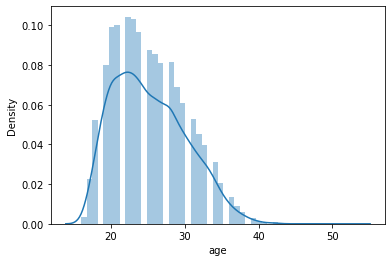

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


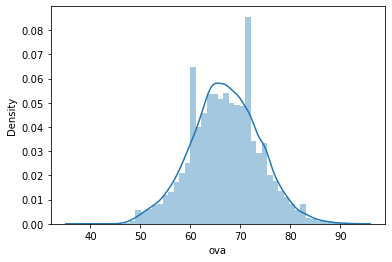

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


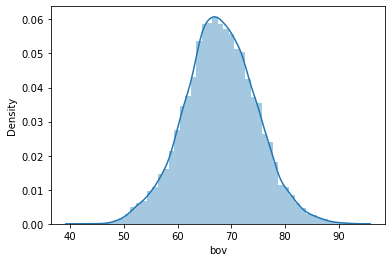

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


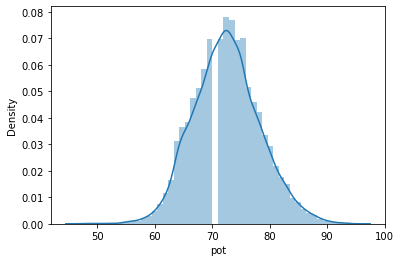

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


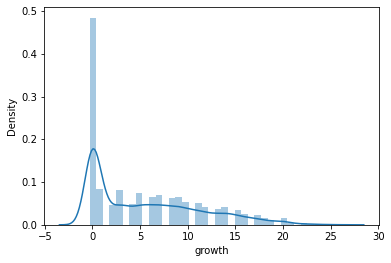

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


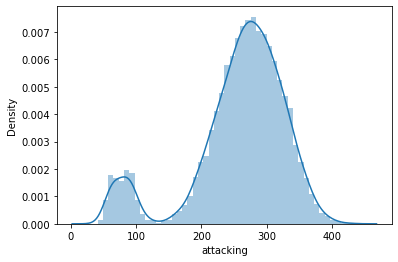

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


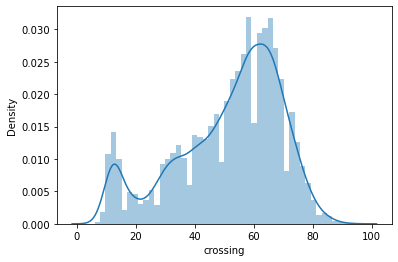

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


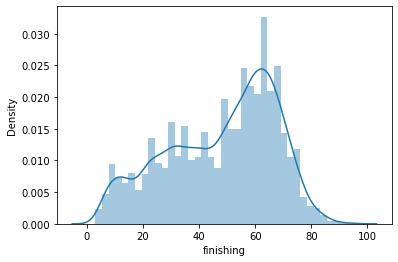

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


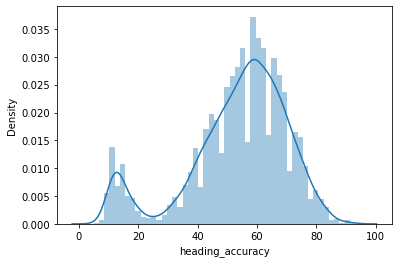

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


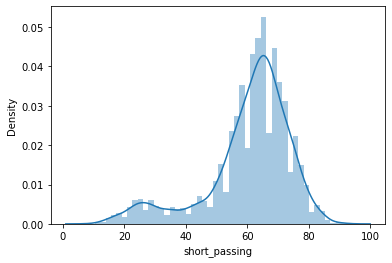

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


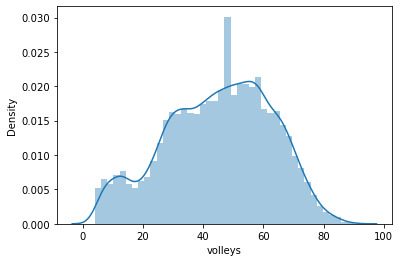

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


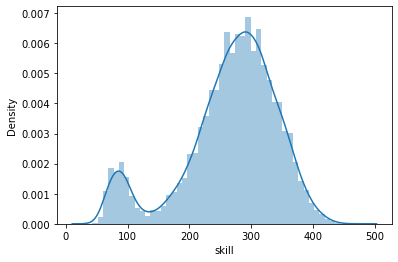

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


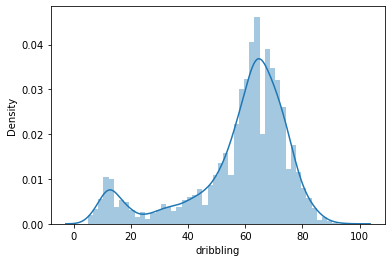

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


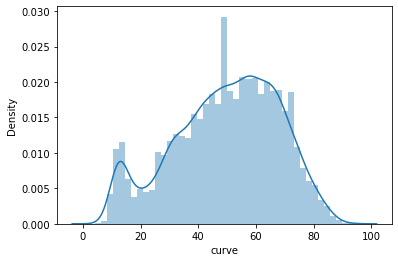

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


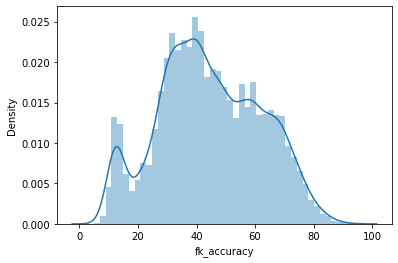

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


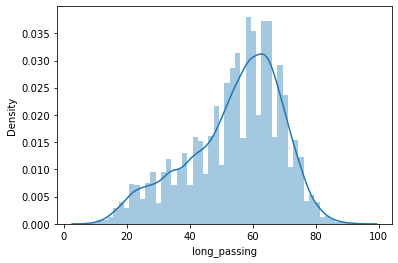

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


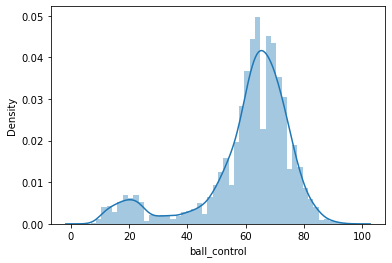

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


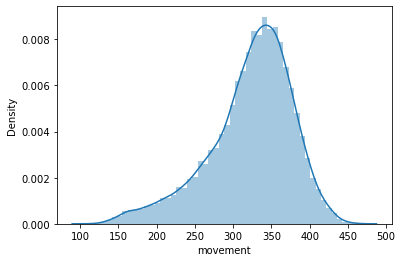

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


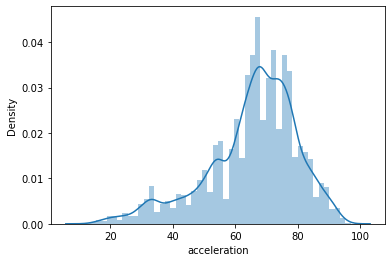

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


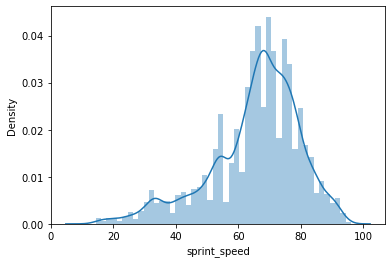

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


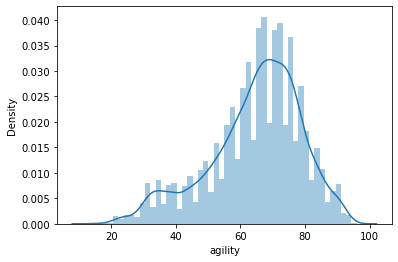

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


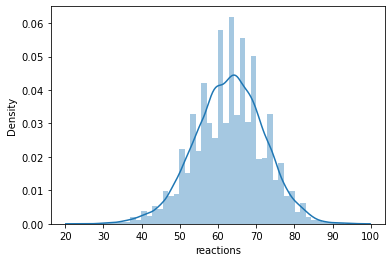

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


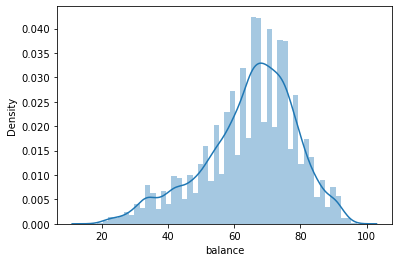

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


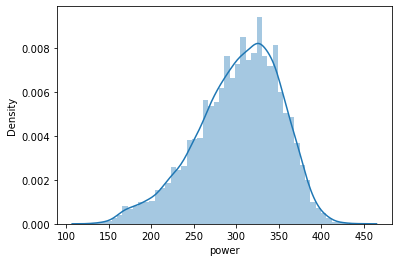

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


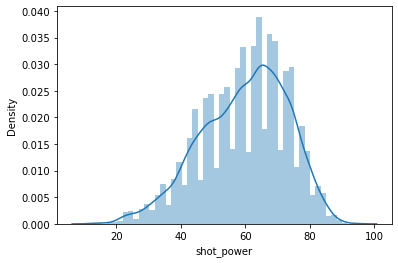

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


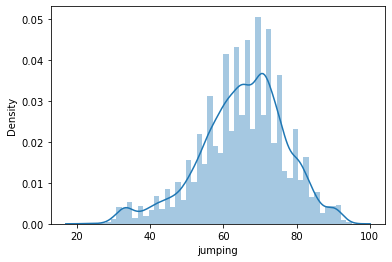

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


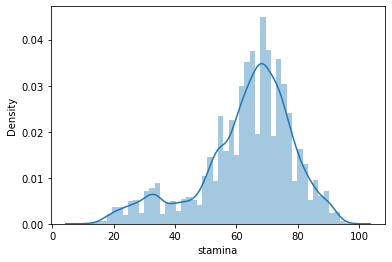

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


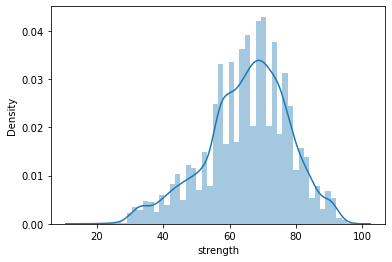

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


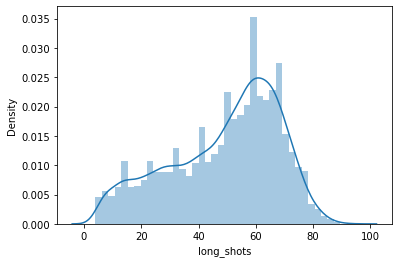

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


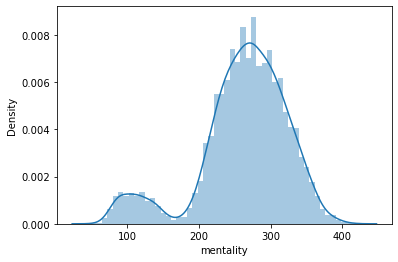

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


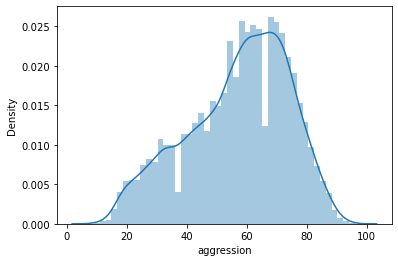

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


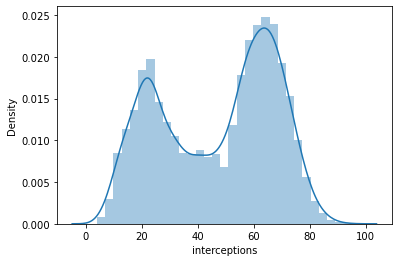

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


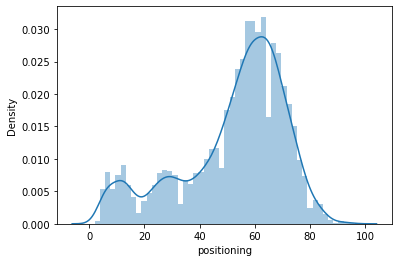

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


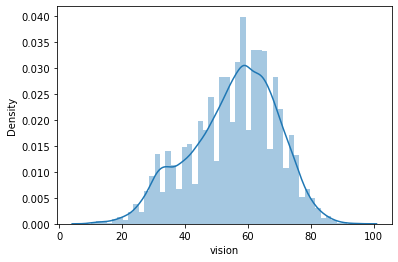

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


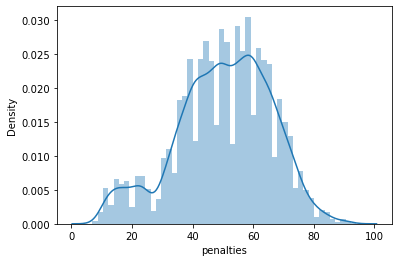

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


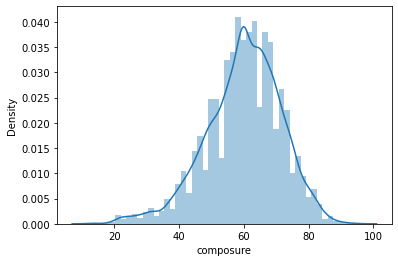

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


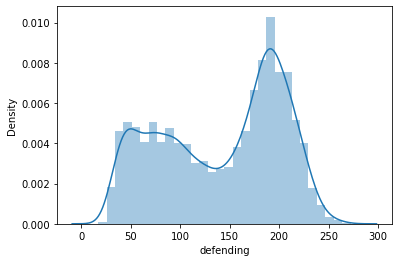

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


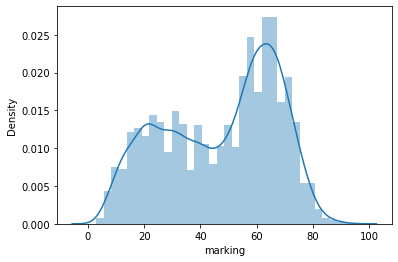

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


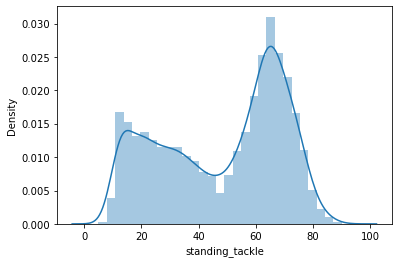

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


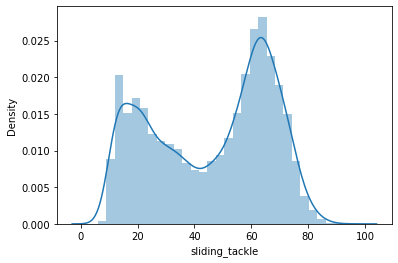

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


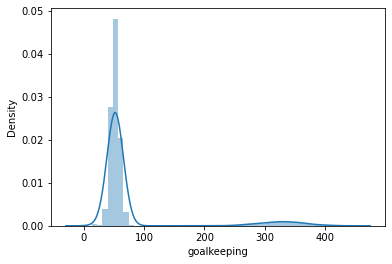

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


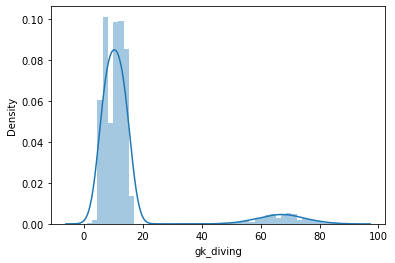

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


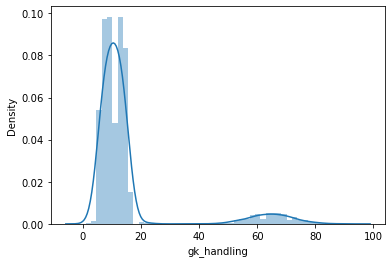

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


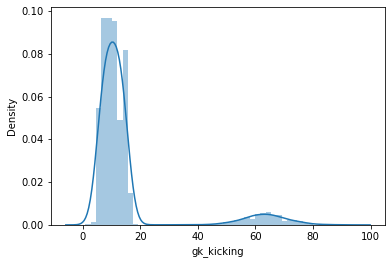

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


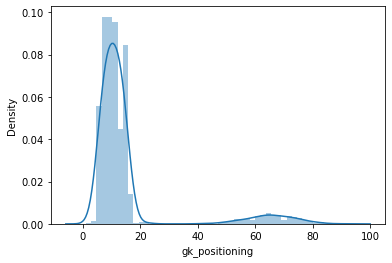

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


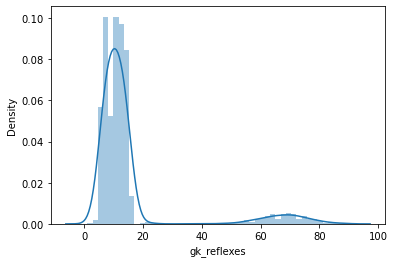

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


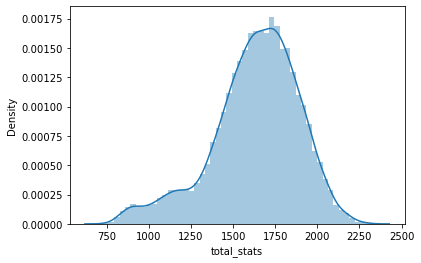

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


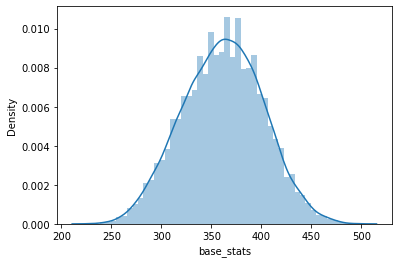

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


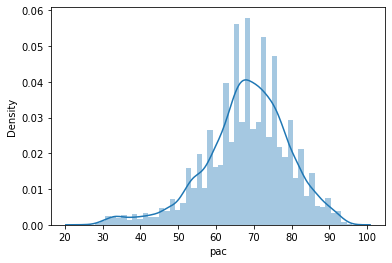

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


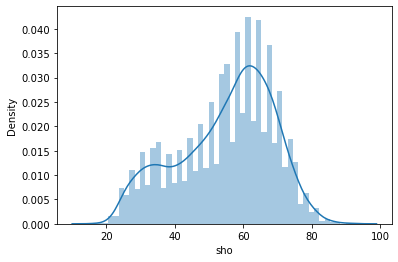

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


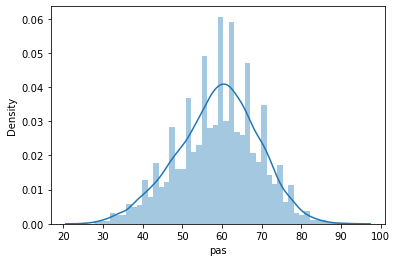

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


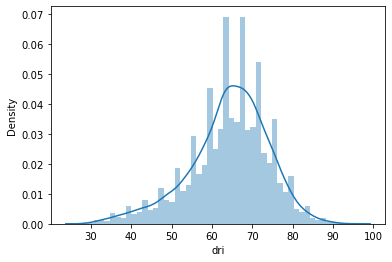

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


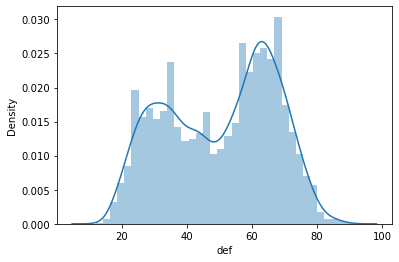

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


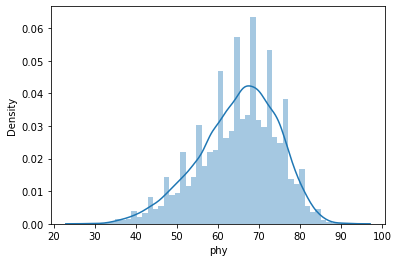

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


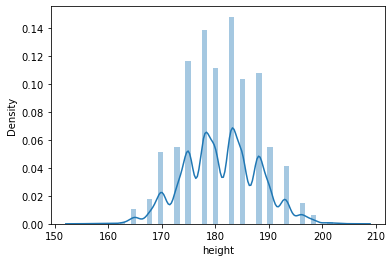

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


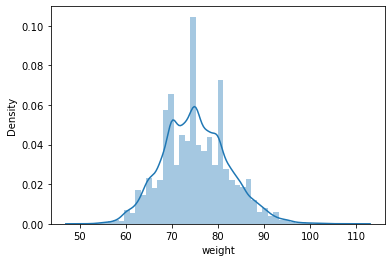

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


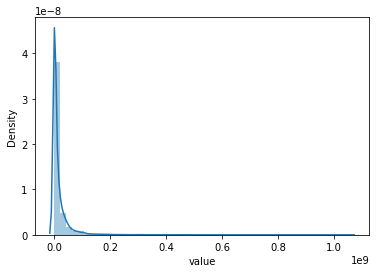

In [21]:
# Check distributions first
for column in df_num.select_dtypes(np.number).columns:
    sns.distplot(df_num[column])
    plt.show()

In [22]:
# Define X and y
X = df_num.drop('value', axis=1)
y = df_num['value']
X

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,total_stats,base_stats,pac,sho,pas,dri,def,phy,height,weight
id,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,0,313,75,50,59,71,...,1929,408,71,59,70,71,68,69,183,82
16,37,71,70,71,0,337,68,64,61,76,...,1906,385,53,69,73,69,58,63,178,65
27,33,71,71,71,0,337,80,64,41,77,...,1770,354,45,68,76,77,36,52,175,73
36,36,68,70,82,14,264,54,70,60,80,...,1348,369,61,66,66,69,47,60,180,75
41,36,81,82,81,0,367,75,69,54,90,...,2014,420,58,70,85,85,63,59,170,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,5,197,35,23,66,47,...,1367,302,54,30,37,48,64,69,198,75
259090,18,56,58,66,10,248,50,43,50,64,...,1529,319,62,46,57,56,43,55,178,77
259091,18,56,56,67,11,218,55,34,53,42,...,1430,303,63,35,44,52,54,55,175,70


In [23]:
#Find correlation Matrix
# Find corr_matrix in X_train, then use the function to drop them in X_test too
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # select Upper part of graph
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # Grouping columns that have a high correlation matrix
    # and that can be considered duplictes

X = X.drop(X[to_drop], axis=1)
X


,age,ova,pot,attacking,heading_accuracy,movement,shot_power,jumping,stamina,strength,aggression,interceptions,vision,composure,goalkeeping,pac,sho,height,weight
id,,,,,,,,,,,,,,,,,,,
2,33,69,69,313,59,347,74,68,69,68,72,69,66,60,56,71,59,183,82
16,37,71,71,337,61,305,75,54,64,60,71,71,73,79,56,53,69,178,65
27,33,71,71,337,41,295,72,58,29,56,69,39,74,60,51,45,68,175,73
36,36,68,82,264,60,176,63,65,51,66,59,70,55,60,68,61,66,180,75
41,36,81,81,367,54,346,67,40,58,62,58,70,93,89,45,58,70,170,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,69,197,66,243,48,70,59,74,69,58,29,46,39,54,30,198,75
259090,18,56,66,248,50,298,51,62,53,57,51,50,53,46,57,62,46,178,77
259091,18,56,67,218,53,308,28,61,53,54,58,55,45,43,40,63,35,175,70


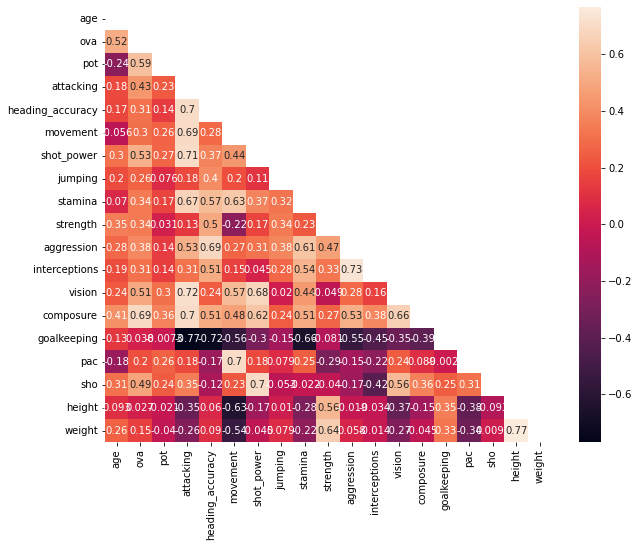

In [24]:
# Display heatmap with correlations using Heatmap, and hiding upper part
# Using Pearson (from -1 to 1)

# We can see now that features are not too correlated with each other - better

mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)] = True # In order to hide upper part of the graph

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(X.corr(), mask=mask, annot=True)
plt.show()


In [25]:
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape


((11987, 19), (5138, 19))

In [36]:
# Defining the regression model
model = LinearRegression()

LinearRegression()

In [37]:
# Building training the model 
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# After having trained the model above, I'm applying it on the test data to make predictions
Y_pred = model.predict(X_test)

### Predictions Results

#### Print model performance

In [45]:
print('Coefficients: ', model.coef_) # for the Linear Regression model
print('Intercept: ', model.intercept_)
print('MSE: %.2f' % mean_squared_error(y_test, Y_pred)) # y_test => actual value
                                                        # Y_pred => predicted value
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, Y_pred))

# The %.2f is used to format the numbers and rounding them to 2 decimals.

Coefficients:  [-1.66248676e+06  3.17325140e+06  3.74115114e+05 -2.64333170e+04
  4.65363849e+03  4.63614503e+04 -4.52942221e+04  1.03703557e+03
 -1.50009014e+04 -2.03582873e+04 -2.21714352e+04  4.17201703e+01
  1.07736027e+05  1.35878091e+05  9.58047309e+03 -1.34091539e+05
  5.05307678e+04  8.93708913e+04  1.06446707e+05]
Intercept:  -217157813.56978306
MSE: 1112328920554770.00
Coefficient of determination (R^2): 0.30


In [47]:
print(df_num.columns)

Index(['age', 'ova', 'bov', 'pot', 'growth', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy',
       'height', 'weight', 'value'],
      dtype='object')


In [ ]:
# That would produce the formula for the regression model:
# Y = -1.66*(age) + 3.17*(ova) + ... - 217157813.57

### Make Scatter Plot
First have a look at the data

In [48]:
y_test

id
252942      325000
248174      975000
257995      400000
226077           0
216054     6000000
            ...   
224132      250000
185195     8000000
240212      475000
1845             0
214949    11000000
Name: value, Length: 5138, dtype: int64

In [50]:
Y_pred

array([ -696505.4773725 , 19216286.42412499,  2953886.70304078, ...,
        7300903.36948252, 24720028.27506426, 16314757.09991291])

#### Now make scatter plot

<AxesSubplot:xlabel='value'>

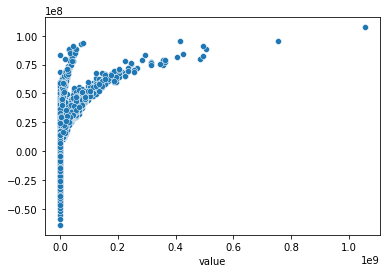

In [53]:
sns.scatterplot(x = y_test, y = Y_pred)

<AxesSubplot:xlabel='value'>

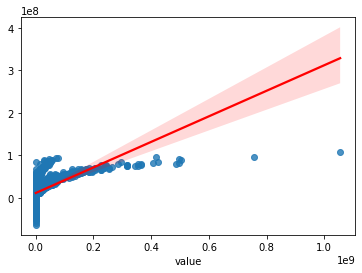

In [57]:
sns.regplot(x = y_test, y = Y_pred, line_kws={"color": "red"}) # Makes highly densed area darker

In [62]:
# Another way

# BOX COX transformation

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci


In [63]:
df_num, _ci = boxcox_transform(df_num)
df_num

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,base_stats,pac,sho,pas,dri,def,phy,height,weight,value
id,,,,,,,,,,,,,,,,,,,,,
2,2.333615,58.848889,56.738223,13.172802,4.584237,56934.043922,519.861971,92.405244,623.109242,14332.041639,...,596.439191,2463.742155,453.868664,283.726599,4182.873266,75.923321,2907.224432,59.182667,5.294810,7.842165
16,2.380795,60.507424,55.975537,13.376923,4.584237,66139.801903,446.511318,124.781721,659.693264,16939.287403,...,560.298652,1375.061893,584.977081,301.077674,3935.403734,64.221941,2411.757129,57.976285,4.966031,7.829569
27,2.333615,60.507424,56.738223,13.376923,4.584237,66139.801903,574.633760,124.781721,334.145282,17491.941822,...,511.846827,992.112263,571.299910,318.724409,4973.603546,38.771068,1626.147109,57.248008,5.129515,8.622632
36,2.369619,58.018831,55.975537,14.448024,7.071382,40306.154688,312.146481,139.135727,641.293042,19213.448114,...,535.252888,1820.130636,544.317993,261.064613,3935.403734,51.439501,2181.787768,58.459936,5.167805,8.704224
41,2.369619,68.770363,65.084741,14.353973,4.584237,78631.537298,519.861971,136.725012,535.474429,25658.655081,...,615.356882,1645.953772,598.777474,373.371302,6141.736449,70.063815,2107.755587,56.026566,5.029399,8.981457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,2.155150,54.693131,52.917746,13.172802,2.854077,22256.113947,159.053626,35.677771,754.905193,5203.354520,...,431.305202,1427.299498,151.443339,114.974132,1813.764877,71.234349,2907.224432,62.749083,5.167805,7.802567
259090,2.059924,48.013556,46.765866,12.860569,5.370950,35504.899041,276.967760,76.882523,469.376742,11106.975306,...,457.528978,1880.129283,303.144517,212.146912,2520.474283,46.818187,1824.716668,57.976285,5.205168,7.323393
259091,2.059924,48.013556,45.219710,12.965478,5.815220,27333.290624,321.171883,57.695561,518.612227,3947.341106,...,432.844752,1941.097618,194.543759,147.015544,2151.709982,59.562112,1824.716668,57.248008,5.070232,7.323393


In [64]:
# Removing Outliers
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [65]:
df_num1 = df_num.copy()

df_num1 = remove_outliers(df_num1, threshold=2, skip_columns=['dob']) # we don't want to reduce our data too much,
## but we can play with the parameters to see,
## so after a better analysis we can choose which columns to drop outliers or not
df_num1

# Removed ~ 4000 rows

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,base_stats,pac,sho,pas,dri,def,phy,height,weight,value
id,,,,,,,,,,,,,,,,,,,,,
2,2.333615,58.848889,56.738223,13.172802,4.584237,56934.043922,519.861971,92.405244,623.109242,14332.041639,...,596.439191,2463.742155,453.868664,283.726599,4182.873266,75.923321,2907.224432,59.182667,5.294810,7.842165
16,2.380795,60.507424,55.975537,13.376923,4.584237,66139.801903,446.511318,124.781721,659.693264,16939.287403,...,560.298652,1375.061893,584.977081,301.077674,3935.403734,64.221941,2411.757129,57.976285,4.966031,7.829569
27,2.333615,60.507424,56.738223,13.376923,4.584237,66139.801903,574.633760,124.781721,334.145282,17491.941822,...,511.846827,992.112263,571.299910,318.724409,4973.603546,38.771068,1626.147109,57.248008,5.129515,8.622632
36,2.369619,58.018831,55.975537,14.448024,7.071382,40306.154688,312.146481,139.135727,641.293042,19213.448114,...,535.252888,1820.130636,544.317993,261.064613,3935.403734,51.439501,2181.787768,58.459936,5.167805,8.704224
61,2.247544,56.357091,52.917746,13.275254,2.258440,42503.820827,377.205120,99.201198,348.225526,8721.600852,...,521.200436,4041.560897,417.050595,206.896680,3695.937221,28.514002,2411.757129,56.760593,5.148779,7.887584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,2.155150,54.693131,52.917746,13.172802,2.854077,22256.113947,159.053626,35.677771,754.905193,5203.354520,...,431.305202,1427.299498,151.443339,114.974132,1813.764877,71.234349,2907.224432,62.749083,5.167805,7.802567
259090,2.059924,48.013556,46.765866,12.860569,5.370950,35504.899041,276.967760,76.882523,469.376742,11106.975306,...,457.528978,1880.129283,303.144517,212.146912,2520.474283,46.818187,1824.716668,57.976285,5.205168,7.323393
259091,2.059924,48.013556,45.219710,12.965478,5.815220,27333.290624,321.171883,57.695561,518.612227,3947.341106,...,432.844752,1941.097618,194.543759,147.015544,2151.709982,59.562112,1824.716668,57.248008,5.070232,7.323393


In [70]:
# Do again X-Y split
X1 = df_num.drop('value', axis=1)
y1 = df_num['value']

# Then divide data in train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [71]:
# Start the model and train it
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [75]:
# Predicting some new values
Y1_pred = model1.predict(X1_test)

In [76]:
# Print model performance
print('Coefficients: ', model1.coef_) # for the Linear Regression model
print('Intercept: ', model1.intercept_)
print('MSE: %.2f' % mean_squared_error(y1_test, Y1_pred)) # y_test => actual value
                                                        # Y_pred => predicted value
print('Coefficient of determination (R^2): %.2f' % r2_score(y1_test, Y1_pred))

Coefficients:  [-1.52156925e+00  8.69421919e-02  2.09270125e-02  2.79865193e-02
 -5.45073781e-03  1.41701059e-06 -4.15753976e-05  8.95195034e-04
  2.94614182e-05 -5.27684992e-06  5.85711669e-04  2.69691147e-05
 -1.71423184e-05 -1.06419908e-03 -1.19508675e-03 -1.24840958e-05
 -1.34021780e-05  6.20010280e-07 -4.06190101e-06 -1.41292163e-05
 -4.06191892e-05 -9.83534357e-04 -8.10155388e-05  1.11405084e-05
 -3.48855469e-04 -1.75932675e-04 -1.86609091e-05 -1.79568696e-04
 -9.59708006e-04  5.13076656e-07  2.15777626e-04  4.58674686e-04
  3.79110452e-05  6.41709157e-05 -1.41224149e-05  5.99185215e-05
 -1.68873434e-02  1.36708600e-02  1.45320585e-02  2.18555502e-02
  2.07358059e+00 -1.07353043e-02  8.02691268e-03 -2.08534570e-02
  5.18042797e-02  7.31739143e-02 -5.72108242e-08  5.21098747e-03
 -1.52827728e-04 -9.40328968e-04 -1.49841374e-03 -4.33154216e-05
 -6.38363460e-03 -1.39968062e-04 -7.59138299e-03  2.98993047e-02]
Intercept:  2.5911041487350204
MSE: 0.08
Coefficient of determination (R^2

<AxesSubplot:xlabel='value'>

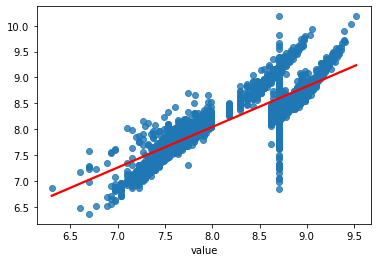

In [78]:
# Reg Plot
# Looks better
sns.regplot(x = y1_test, y = Y1_pred, line_kws={"color": "red"})

In [79]:
# Analyzing results

import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y1_test, _ci['value'])
results['pred'] = Y1_pred
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
id,,,
252942,3.250000e+05,7.698139,3.249923e+05
248174,9.750000e+05,8.152528,9.749918e+05
257995,4.000000e+05,7.825210,3.999922e+05
226077,1.555375e+07,8.154474,1.555374e+07
216054,6.000000e+06,8.788697,5.999991e+06
...,...,...,...
224132,2.500000e+05,7.533919,2.499925e+05
185195,8.000000e+06,8.792987,7.999991e+06
240212,4.750000e+05,7.882618,4.749921e+05


<AxesSubplot:xlabel='true', ylabel='pred'>

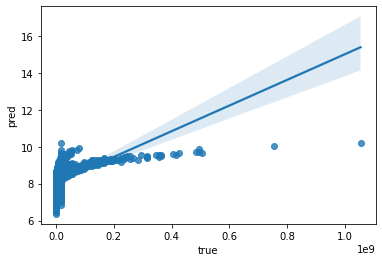

In [83]:
# Didn't predict properly straight line

sns.regplot(x=results['true'], y=results['pred'])

<AxesSubplot:xlabel='ova', ylabel='value'>

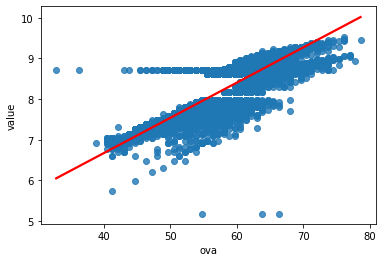

In [89]:
# Trying to see if Overall Overage and Value are correlated - mostly they are 
sns.regplot(x=df_num['ova'], y=df_num["value"], line_kws={"color": "red"})

-------------------------

In [87]:
# Replace in original DF columns that have been changed
df['height'] = to_change['height']
df['weight'] = to_change['weight']
df['value'] = to_change['value']
df

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


In [88]:
# We can sort players by their value
sorted_by_value = df.sort_values('value', ascending=False)
sorted_by_value

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
231747,K. Mbappé,21,90,France,Paris Saint-Germain,91,ST,ST LW RW,https://cdn.sofifa.com/players/231/747/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,...,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,18+3,Male
203376,V. van Dijk,28,90,Netherlands,Liverpool,90,CB,CB,https://cdn.sofifa.com/players/203/376/20_120.png,https://cdn.sofifa.com/teams/9/light_60.png,...,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3,20+3,Male
202652,R. Sterling,25,88,England,Manchester City,88,LW,LW RW,https://cdn.sofifa.com/players/202/652/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,...,64+3,64+3,69+3,65+3,55+3,55+3,55+3,65+3,21+3,Male
192448,M. ter Stegen,28,90,Germany,FC Barcelona,90,GK,GK,https://cdn.sofifa.com/players/192/448/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,...,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,88+3,Male
233049,J. Sancho,20,87,England,Borussia Dortmund,89,CAM,RM LM CAM,https://cdn.sofifa.com/players/233/049/20_120.png,https://cdn.sofifa.com/teams/22/light_60.png,...,62+3,62+3,66+3,61+3,49+3,49+3,49+3,61+3,19+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254136,E. Just,20,61,New Zealand,New Zealand,63,RM,LW RW CAM,https://cdn.sofifa.com/players/254/136/20_120.png,https://cdn.sofifa.com/teams/111473/light_60.png,...,42+2,42+2,46+2,44+2,35+2,35+2,35+2,44+2,17+2,Male
21570,Rogério Ceni,40,75,Brazil,São Paulo,75,GK,GK,https://cdn.sofifa.com/players/021/570/14_120.png,https://cdn.sofifa.com/teams/598/light_60.png,...,44+0,44+0,37+0,35+0,38+0,38+0,38+0,35+0,75+0,Male
250841,P. Álvarez,26,67,Peru,Peru,67,GK,GK,https://cdn.sofifa.com/players/250/841/20_120.png,https://cdn.sofifa.com/teams/111108/light_60.png,...,19+2,19+2,15+2,15+2,19+2,19+2,19+2,15+2,66+2,Male
